<b>Bollywood Movies Data Analysis - Nivi Bhagat Munjal</b><br><br>

Purpose of this Data Analysis is to gather insights and trends of the Bollywood Hindi Film Industry over the years, from 2005 to 2017. <br><br>

With the rise of streaming and OTT platforms to view movies, this analysis will look into this shift through revenues, budget, genres of films, choice of lead actors and actresses, ratings, and more. <br><br>

Kaggle Dataset Used (Note: I modified the provided CSV file with more columns of Year Released, Lead Star Gender, Rating, Rating Count, and Box Office Collection for more relevant analyses): https://www.kaggle.com/datasets/rishidamarla/bollywood-movies-dataset/data


<b>Questions to Explore</b><br><br>

<ul>
<li> How have the revenues of Bollywood films changed throughout the years, especially with the rise of streaming platforms like Netflix and Amazon prime?<ul><li>For example, what are the revenues and budgets being given to movies like from 2005-2014 and 2015-2017 (assuming 2015-2016 as the breakthrough years for Netflix)?</li></ul></li>

<li> Most popular actors of all time (2005-2017) and for each year based on revenues
</li>

<li>Breakdown of popular actors' gender (male popular actors vs female popular actors based on revenue)</li>

<li>Breakdown of genres</li>

<li>Top profitable movies</li>

<li>Differences in the budget given to movies with male lead actors versus movies with female lead actresses, and the differences in revenue earned and profitability. </li>

<li>What are the popular genres for each year?</li>

<li>What directors and musical directors are in the most demand? (Based on number of films worked on and revenue/success of the film)</li>

<li>How does a lead actor/actress or director being new to the film industry affect the budget given to the movie and revenues earned?</li>

<li>Do Franchise movies earn more in revenues compared to non-franchise movies since viewers might be more familiar with and willing to see franchise movies?</li>

<li> Do certain lead actors/actresses have higher rated movies on average, showing a possible audience preference for those celebrities?</li>

<li> Do certain genres have higher rated movies on average, showing an audience preference for those types of films?</li>

<li> Hypothesis Testing - Are the revenues earned by male-led films significantly different from female led movies?</li>

<li> Which actors and actresses have the most hit movies versus flop (underperforming/failure) movies?</li>

<li> Do movies released during holiday periods sell better (based by revenues) compared to normal release periods? </li>

<li> Does number of theater screens affect revenues? </li>

<li> Do remakes do well in revenue and profitability? </li>

</ul>

<b> Methodology </b><br><br>

<ol>
<li> Data Cleaning </li>
<li> Dataframe modification
  <ul>
  <li>Profit based on Revenues - Budget</li>
  <li> Year Released </li>
  <li>Gender of actor/actress</li>
  <li>Rating of Movie and Number of Ratings per Movie</li>
  <li>Gender of actor/actress</li>
  <li> Box Office Collection (Hit vs. Flop, etc.)
  </ul>
</li>
<li>Analysis guided by exploratory questions</li>
<li>Hypothesis Testing </li>
<li> Data Visualizations </li>
</ol>

<b>Box Office Collection Classification Criteria Example:</b><br><br>


Profit 0% - 10% (Average)

Profit >10% upto 25% (Above Average)

Profit > 25% upto 40% (HIT)

Profit > 40% upto 75% (SUPERHIT)

Profit > 75% upto 125% (BLOCKBUSTER)

Profit > 125% (ALL TIME BLOCKBUSTER)

Loss of Less than 15% - BELOW AVERAGE

Loss of More than 15% but less than 40% - FLOP

Loss of More than 40% - DISASTER

Link/Source: https://balusboxoffice.quora.com/Classification-of-Movies-as-Hits-Superhits-Blockbusters-Flops<br><br>

<b>Box Office India (https://www.boxofficeindia.com/) uses All Time Blockbuster, Blockbuster, Hit, Super Hit, Semi Hit, Average, Below Average, Flop, and Disaster to classify the performance of movies in the Box Office. This analysis will be using these nine classification categories.</b>

In [ ]:
# Loading Imports
%matplotlib inline
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Graphing
from scipy import stats # Stats
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Data Analysis - BW Analysis/BollywoodMoviesUpdated2.csv")

In [ ]:
df

,Movie Name,Release Year,Release Period,Remake?,Franchise?,Genre,New Actor,New Director,New Music Director,Lead Star,Lead Star Gender,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Rating Avg,Rating Count,Collection
0,Golden Boys,2008,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Male,Ravi Varma,Baba Jagirdar,5,5000000,85000,NaN,0,Disaster
1,Kaccha Limboo,2011,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Male,Sagar Ballary,Amardeep Nijjer,75,15000000,825000,5.9,111,Disaster
2,Not A Love Story,2011,Holiday,No,No,thriller,No,No,No,Mahie Gill,Female,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000,5.2,748,Flop
3,Qaidi Band,2017,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Male,Habib Faisal,Amit Trivedi,800,210000000,4500000,6.1,520,Disaster
4,Chaatwali,2009,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Male,Aadil Khan,Babloo Ustad,1,1000000,1075000,NaN,0,Disaster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Fight Club,2006,Holiday,No,No,action,No,Yes,No,Zayed Khan,Male,Vikram Chopra,Pritam,375,82500000,88862500,3.6,1660,Flop
1662,Strings Of Paasion,2012,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Female,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000,6.9,39,Disaster
1663,Dunno Y Na Jaane Kyun,2010,Normal,No,No,drama,No,No,No,Zeenat Aman,Female,Sanjay Sharma,Nikhil,20,12500000,850000,3.8,171,Disaster
1664,Taj Mahal - An Eternal Love Story,2005,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Male,Akbar Khan,Naushad,135,100000000,31065000,5.2,199,Disaster


In [ ]:
# Data Cleaning and Dataframe Enhancement

# Identify duplicate rows
duplicates = df.duplicated()

print(df[duplicates])

df_updated = df.drop_duplicates()

#df_updated

    Movie Name  Release Year Release Period Remake? Franchise?   Genre  \
672      Aatma          2013         Normal      No         No  horror   

    New Actor New Director New Music Director     Lead Star Lead Star Gender  \
672        No           No                 No  Bipasha Basu           Female   

          Director Music Director  Number of Screens  Revenue(INR)  \
672  Deepak Ramsay      Anu Malik                 70      25000000   

     Budget(INR)  Rating Avg  Rating Count Collection  
672      9400000         3.9           737       Flop  


In [ ]:
# Add a column to show a film's profitability (Revenues - Budget)
df_updated["Profit"] = df_updated.iloc[:, 14] - df_updated.iloc[:, 15]
df_updated

<ipython-input-5-2d2f1928b551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated["Profit"] = df_updated.iloc[:, 14] - df_updated.iloc[:, 15]


,Movie Name,Release Year,Release Period,Remake?,Franchise?,Genre,New Actor,New Director,New Music Director,Lead Star,Lead Star Gender,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Rating Avg,Rating Count,Collection,Profit
0,Golden Boys,2008,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Male,Ravi Varma,Baba Jagirdar,5,5000000,85000,NaN,0,Disaster,4915000
1,Kaccha Limboo,2011,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Male,Sagar Ballary,Amardeep Nijjer,75,15000000,825000,5.9,111,Disaster,14175000
2,Not A Love Story,2011,Holiday,No,No,thriller,No,No,No,Mahie Gill,Female,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000,5.2,748,Flop,18300000
3,Qaidi Band,2017,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Male,Habib Faisal,Amit Trivedi,800,210000000,4500000,6.1,520,Disaster,205500000
4,Chaatwali,2009,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Male,Aadil Khan,Babloo Ustad,1,1000000,1075000,NaN,0,Disaster,-75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Fight Club,2006,Holiday,No,No,action,No,Yes,No,Zayed Khan,Male,Vikram Chopra,Pritam,375,82500000,88862500,3.6,1660,Flop,-6362500
1662,Strings Of Paasion,2012,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Female,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000,6.9,39,Disaster,7930000
1663,Dunno Y Na Jaane Kyun,2010,Normal,No,No,drama,No,No,No,Zeenat Aman,Female,Sanjay Sharma,Nikhil,20,12500000,850000,3.8,171,Disaster,11650000
1664,Taj Mahal - An Eternal Love Story,2005,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Male,Akbar Khan,Naushad,135,100000000,31065000,5.2,199,Disaster,68935000


In [ ]:
# Check types of columns

print(df_updated.dtypes)

#print(df_updated)

Movie Name             object
Release Year            int64
Release Period         object
Remake?                object
Franchise?             object
Genre                  object
New Actor              object
New Director           object
New Music Director     object
Lead Star              object
Lead Star Gender       object
Director               object
Music Director         object
Number of Screens       int64
Revenue(INR)            int64
Budget(INR)             int64
Rating Avg            float64
Rating Count            int64
Collection             object
Profit                  int64
dtype: object


In [ ]:
# Data Exploration

df_updated

,Movie Name,Release Year,Release Period,Remake?,Franchise?,Genre,New Actor,New Director,New Music Director,Lead Star,Lead Star Gender,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Rating Avg,Rating Count,Collection,Profit
0,Golden Boys,2008,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Male,Ravi Varma,Baba Jagirdar,5,5000000,85000,NaN,0,Disaster,4915000
1,Kaccha Limboo,2011,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Male,Sagar Ballary,Amardeep Nijjer,75,15000000,825000,5.9,111,Disaster,14175000
2,Not A Love Story,2011,Holiday,No,No,thriller,No,No,No,Mahie Gill,Female,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000,5.2,748,Flop,18300000
3,Qaidi Band,2017,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Male,Habib Faisal,Amit Trivedi,800,210000000,4500000,6.1,520,Disaster,205500000
4,Chaatwali,2009,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Male,Aadil Khan,Babloo Ustad,1,1000000,1075000,NaN,0,Disaster,-75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Fight Club,2006,Holiday,No,No,action,No,Yes,No,Zayed Khan,Male,Vikram Chopra,Pritam,375,82500000,88862500,3.6,1660,Flop,-6362500
1662,Strings Of Paasion,2012,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Female,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000,6.9,39,Disaster,7930000
1663,Dunno Y Na Jaane Kyun,2010,Normal,No,No,drama,No,No,No,Zeenat Aman,Female,Sanjay Sharma,Nikhil,20,12500000,850000,3.8,171,Disaster,11650000
1664,Taj Mahal - An Eternal Love Story,2005,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Male,Akbar Khan,Naushad,135,100000000,31065000,5.2,199,Disaster,68935000


In [ ]:
print(df_updated['Release Year'].value_counts())

Release Year
2005    181
2013    164
2014    152
2010    147
2011    142
2012    140
2009    134
2006    134
2008    127
2007    123
2015     84
2017     70
2016     67
Name: count, dtype: int64


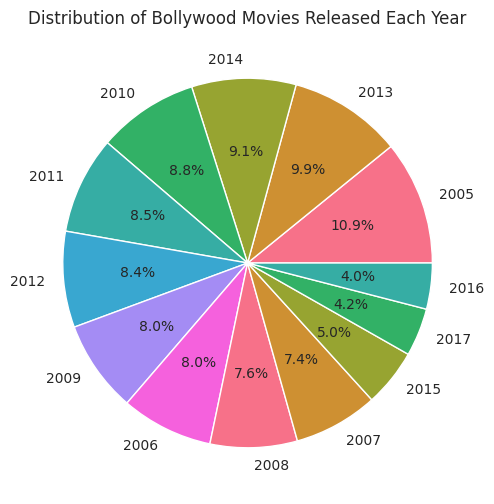

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("husl", 8)
plt.figure(figsize=(6,6))
movie_per_year_counts = df['Release Year'].value_counts()
plt.pie(movie_per_year_counts, labels=movie_per_year_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Bollywood Movies Released Each Year')
plt.show()

In [ ]:
# Release Year Average and Median
print(df_updated['Release Year'].mean())
print(df_updated['Release Year'].median())

2010.3819819819819
2010.0


In [ ]:
print(df_updated['Release Period'].value_counts())

Release Period
Normal     1061
Holiday     634
Name: count, dtype: int64


In [ ]:
print(df_updated['Remake?'].value_counts())

Remake?
No     1594
Yes      71
Name: count, dtype: int64


In [ ]:
print(df_updated['Franchise?'].value_counts())

Franchise?
No     1584
Yes      81
Name: count, dtype: int64


In [ ]:
print(df_updated['Genre'].value_counts())

Genre
drama           620
comedy          283
thriller        210
love_story      133
action          125
rom__com         95
adult            72
horror           50
suspense         30
masala           16
mythological     14
fantasy          13
animation         3
documentary       1
Name: count, dtype: int64


In [ ]:
print(df_updated['Genre'].nunique())

14


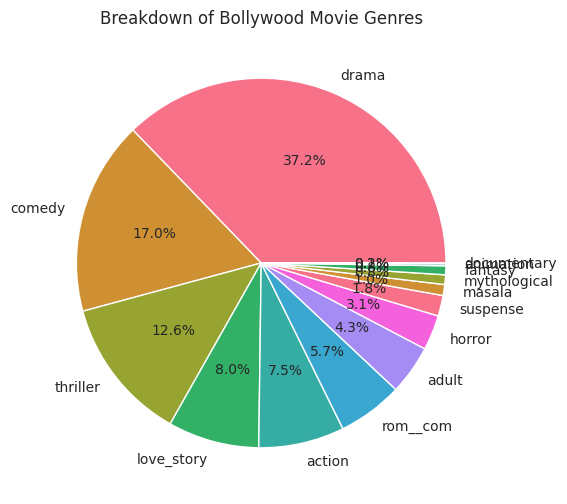

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("husl", 8)
plt.figure(figsize=(6,6))
genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Breakdown of Bollywood Movie Genres')
plt.show()

In [ ]:
print(df_updated['New Actor'].value_counts())

New Actor
No     1229
Yes     436
Name: count, dtype: int64


In [ ]:
print(df_updated['New Director'].value_counts())

New Director
No     868
Yes    797
Name: count, dtype: int64


In [ ]:
print(df_updated['New Music Director'].value_counts())

New Music Director
No     1123
Yes     542
Name: count, dtype: int64


In [ ]:
print(df_updated['Lead Star'].value_counts().head(10))

Lead Star
Akshay Kumar        48
Ajay Devgn          35
Emraan Hashmi       27
Salman Khan         27
Amitabh Bachchan    21
Sanjay Dutt         18
Shahid Kapoor       18
Saif Ali Khan       18
Ranbir Kapoor       17
John Abraham        17
Name: count, dtype: int64


In [ ]:
print(df_updated['Lead Star'].nunique())

741


In [ ]:
print(df_updated['Lead Star Gender'].value_counts())

Lead Star Gender
Male      1397
Female     268
Name: count, dtype: int64


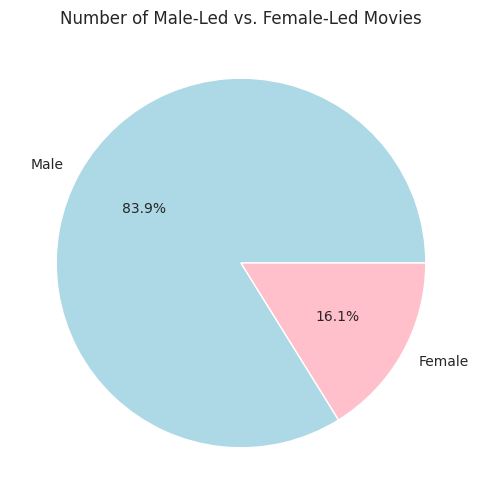

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette(["lightblue", "pink"])
plt.figure(figsize=(6,6))
gender_counts = df['Lead Star Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Number of Male-Led vs. Female-Led Movies')
plt.show()

In [ ]:
print(df_updated['Director'].value_counts().head(10))

Director
Ram Gopal Verma      18
Vikram Bhatt         16
Priyadarshan         16
Suresh Jain          15
Mohit Suri           11
Rohit Shetty         11
Anurag Kashyap       10
Madhur Bhandarkar     9
Anees Bazmee          9
David Dhawan          8
Name: count, dtype: int64


In [ ]:
print(df_updated['Director'].nunique())

1026


In [ ]:
print(df_updated['Music Director'].value_counts().head(10))

Music Director
Pritam                    93
Himesh Reshammiya         51
Sajid - Wajid             48
Anu Malik                 41
Shankar - Ehsaan - Loy    41
Vishal - Shekhar          40
Salim - Sulaiman          34
A.R. Rehman               26
Amit Trivedi              25
Sachin - Jigar            24
Name: count, dtype: int64


In [ ]:
# Number of Screens Average and Median
print(df_updated['Number of Screens'].mean())
print(df_updated['Number of Screens'].median())

564.3231231231231
225.0


In [ ]:
# Revenue (INR) Average and Median
print(df_updated['Revenue(INR)'].mean())
print(df_updated['Revenue(INR)'].median())

152942477.4774775
57500000.0


In [ ]:
# Budget (INR) Average and Median
print(df_updated['Budget(INR)'].mean())
print(df_updated['Budget(INR)'].median())

242404835.45825827
14295000.0


In [ ]:
# Profit (INR) Average and Median
print(df_updated['Profit'].mean())
print(df_updated['Profit'].median())

-89462357.98078078
9930000.0


In [ ]:
# Movie Rating on IMDB Average and Median
print(df_updated['Rating Avg'].mean())
print(df_updated['Rating Avg'].median())

5.539017543859649
5.6


In [ ]:
# Number of Rating Votes on IMDB Average and Median
print(df_updated['Rating Count'].mean())
print(df_updated['Rating Count'].median())

5758.688288288288
441.0


In [ ]:
print(df_updated['Collection'].value_counts())

Collection
Disaster                1086
Flop                     297
Hit                       71
Semi Hit                  61
Average                   52
Below Average             38
Super Hit                 33
Blockbuster               21
All Time Blockbuster       6
Name: count, dtype: int64


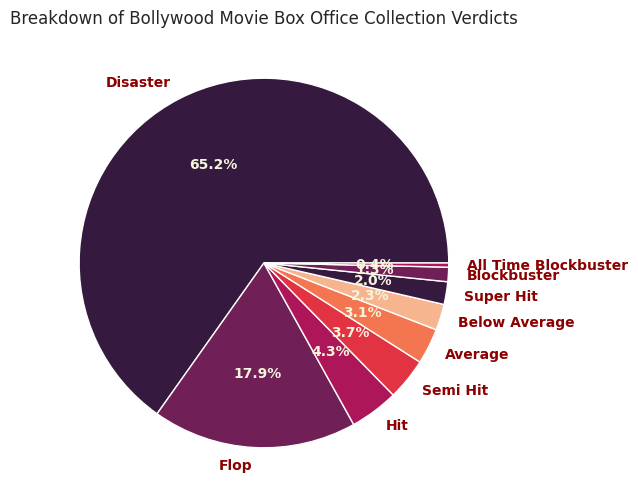

In [ ]:
sns.set_style("whitegrid")
colors = sns.color_palette("rocket")
plt.figure(figsize=(6,6))
collec_counts = df['Collection'].value_counts()
_, texts, autotexts = plt.pie(collec_counts, labels=collec_counts.index, autopct='%1.1f%%', colors=colors)

for text in texts:
    text.set_color('darkred')
    text.set_weight('bold')

for autotext in autotexts:
    autotext.set_color('beige')
    autotext.set_weight('bold')
plt.title('Breakdown of Bollywood Movie Box Office Collection Verdicts')
plt.show()

Question-Guided Analysis:

How have the average revenues, budgets, and profitability of Bollywood films changed throughout the years on average, especially with the rise of streaming platforms like Netflix and Amazon prime?

In [ ]:
print("Revenues in INR throughout the years:")
print(df_updated.groupby("Release Year")['Revenue(INR)'].mean())
print("")
print("Budgets in INR throughout the years:")
print(df_updated.groupby("Release Year")['Budget(INR)'].mean())
print("")
print("Profits in INR throughout the years:")
print(df_updated.groupby("Release Year")['Profit'].mean())
print("")

Revenues in INR throughout the years:
Release Year
2005    4.666575e+07
2006    7.835597e+07
2007    9.076220e+07
2008    1.076457e+08
2009    1.282854e+08
2010    1.312364e+08
2011    1.297817e+08
2012    1.478000e+08
2013    1.693445e+08
2014    1.798291e+08
2015    3.453274e+08
2016    3.457201e+08
2017    3.998286e+08
Name: Revenue(INR), dtype: float64

Budgets in INR throughout the years:
Release Year
2005    6.556716e+07
2006    1.369371e+08
2007    1.474051e+08
2008    1.524904e+08
2009    1.461112e+08
2010    1.549459e+08
2011    1.947486e+08
2012    2.735893e+08
2013    2.771074e+08
2014    2.893366e+08
2015    5.682086e+08
2016    6.169833e+08
2017    7.012113e+08
Name: Budget(INR), dtype: float64

Profits in INR throughout the years:
Release Year
2005   -1.890142e+07
2006   -5.858115e+07
2007   -5.664292e+07
2008   -4.484470e+07
2009   -1.782573e+07
2010   -2.370953e+07
2011   -6.496692e+07
2012   -1.257893e+08
2013   -1.077628e+08
2014   -1.095075e+08
2015   -2.228812e+08
2

In [ ]:
# Using Median as a Measure (to account for the large amounts of "disaster" profitability films that end up skewing the mean)
print("Revenues in INR throughout the years:")
print(df_updated.groupby("Release Year")['Revenue(INR)'].median())
print("")
print("Budgets in INR throughout the years:")
print(df_updated.groupby("Release Year")['Budget(INR)'].median())
print("")
print("Profits in INR throughout the years:")
print(df_updated.groupby("Release Year")['Profit'].median())
print("")

Revenues in INR throughout the years:
Release Year
2005     20000000.0
2006     36250000.0
2007     45000000.0
2008     52500000.0
2009     48750000.0
2010     55000000.0
2011     52500000.0
2012     40000000.0
2013     52500000.0
2014     60000000.0
2015    175000000.0
2016    230000000.0
2017    265000000.0
Name: Revenue(INR), dtype: float64

Budgets in INR throughout the years:
Release Year
2005      6843500.0
2006      5450000.0
2007     15800000.0
2008     19400000.0
2009      8350000.0
2010     10300000.0
2011      6162500.0
2012      3700000.0
2013      8250000.0
2014      8150000.0
2015    127548000.0
2016    208775000.0
2017    200040000.0
Name: Budget(INR), dtype: float64

Profits in INR throughout the years:
Release Year
2005     3175000.0
2006     8713750.0
2007     5900000.0
2008    12400000.0
2009    20275000.0
2010    14850000.0
2011    14645000.0
2012    11942500.0
2013     8200000.0
2014    11450000.0
2015     3325000.0
2016     4300000.0
2017     -950000.0
Name: Profi

What are the most popular actors of all time (2005-2017) and for each year based on revenues and profitability?

In [ ]:
# All Time Top 15 Actors based on Revenues (2005-2017)
print("All Time Top 15 Actors based on Revenues (2005-2017)")
print(df_updated.groupby("Lead Star")["Revenue(INR)"].mean().sort_values(ascending=False).head(15))
print("")

# All Time Top 15 Actors based on Profits (2005-2017)
print("All Time Top 15 Actors based on Profits (2005-2017)")
print(df_updated.groupby("Lead Star")["Profit"].mean().sort_values(ascending=False).head(15))

All Time Top 15 Actors based on Revenues (2005-2017)
Lead Star
Prabhas                 1.825000e+09
Shahrukh Khan           8.537500e+08
Hrithik Roshan          8.236364e+08
Aamir Khan              7.420000e+08
Salman Khan             6.859259e+08
Harshvardhan Kapoor     6.300000e+08
Ram Charan              6.000000e+08
Vincent D'Onofrio       6.000000e+08
Ranveer Singh           5.977778e+08
Ranbir Kapoor           5.945588e+08
Akshay Kumar            5.087500e+08
Sushant Singh Rajput    4.940000e+08
Varun Dhawan            4.771429e+08
Alia Bhatt              4.600000e+08
Zaira Wasim             4.500000e+08
Name: Revenue(INR), dtype: float64

All Time Top 15 Actors based on Profits (2005-2017)
Lead Star
Vincent D'Onofrio      589870000.0
Harshvardhan Kapoor    495335000.0
Ram Charan             378525000.0
Vinay Virmani          315600000.0
Vikram                 297900000.0
Mustafa Burmawalla     265152500.0
Sachiin Joshi          222900000.0
Aadar Jain             205500000.0
Mish

In [ ]:
# Top 15 Actors based on Revenues for Each Year:
#print(df_updated.groupby(["Release Year", "Lead Star"])["Revenue(INR)"].mean().sort_values(ascending=False).head(10))

# Group by 'Release Year' and 'Lead Star', then calculate the mean revenue
grouped = df_updated.groupby(["Release Year", "Lead Star"])["Revenue(INR)"].mean()

# Do the same as above, but with profit instead.
grouped_profit = df_updated.groupby(["Release Year", "Lead Star"])["Profit"].mean()

# For each year, get the top 10 actors based on average revenue and average profits
top_actors_per_year = grouped.groupby("Release Year", group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(15))
top_actors_per_year_profit = grouped_profit.groupby("Release Year", group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(15))
# Display the results
#top_actors_per_year

#print(top_actors_per_year.index)

# Filter top actors for the year 2005
top_actors_2005 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2005]
top_actors_2005_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2005]

# Display the filtered data for 2005 Actors
print(top_actors_2005)
print("")
print(top_actors_2005_profit)
print("")
print("")

# 2006
top_actors_2006 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2006]
top_actors_2006_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2006]


print(top_actors_2006)
print("")
print(top_actors_2006_profit)
print("")
print("")

# 2007
top_actors_2007 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2007]
top_actors_2007_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2007]


print(top_actors_2007)
print("")
print(top_actors_2007_profit)
print("")
print("")

# 2008
top_actors_2008 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2008]
top_actors_2008_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2008]


print(top_actors_2008)
print("")
print(top_actors_2008_profit)
print("")
print("")

# 2009
top_actors_2009 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2009]
top_actors_2009_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2009]


print(top_actors_2009)
print("")
print(top_actors_2009_profit)
print("")
print("")

# 2010
top_actors_2010 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2010]
top_actors_2010_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2010]


print(top_actors_2010)
print("")
print(top_actors_2010_profit)
print("")
print("")

# 2011
top_actors_2011 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2011]
top_actors_2011_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2011]


print(top_actors_2011)
print("")
print(top_actors_2011_profit)
print("")
print("")

# 2012
top_actors_2012 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2012]
top_actors_2012_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2012]


print(top_actors_2012)
print("")
print(top_actors_2012_profit)
print("")
print("")

# 2013
top_actors_2013 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2013]
top_actors_2013_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2013]


print(top_actors_2013)
print("")
print(top_actors_2013_profit)
print("")
print("")

# 2014
top_actors_2014 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2014]
top_actors_2014_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2014]


print(top_actors_2014)
print("")
print(top_actors_2014_profit)
print("")
print("")

# 2015
top_actors_2015 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2015]
top_actors_2015_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2015]


print(top_actors_2015)
print("")
print(top_actors_2015_profit)
print("")
print("")

#2016
top_actors_2016 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2016]
top_actors_2016_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2016]


print(top_actors_2016)
print("")
print(top_actors_2016_profit)
print("")
print("")

#2017
top_actors_2017 = top_actors_per_year.loc[top_actors_per_year.index.get_level_values('Release Year') == 2017]
top_actors_2017_profit = top_actors_per_year_profit.loc[top_actors_per_year_profit.index.get_level_values('Release Year') == 2017]


print(top_actors_2017)
print("")
print(top_actors_2017_profit)
print("")
print("")

# Number of actors per year
actors_per_year = grouped.groupby("Release Year").size()
print(actors_per_year)

Release Year  Lead Star        
2005          Aamir Khan           3.700000e+08
              Akshay Kumar         1.725000e+08
              Salman Khan          1.666667e+08
              Sanjay Dutt          1.575000e+08
              Sunny Deol           1.500000e+08
              Anil Kapoor          1.437500e+08
              Shahrukh Khan        1.400000e+08
              Vivek Oberoi         1.350000e+08
              Amitabh Bachchan     1.306250e+08
              Shahid Kapoor        1.300000e+08
              Arjun Rampal         1.166667e+08
              Abhishek Bachchan    1.125000e+08
              Ajay Devgn           1.068750e+08
              Saif Ali Khan        1.066667e+08
              Fardeen Khan         1.037500e+08
Name: Revenue(INR), dtype: float64

Release Year  Lead Star           
2005          Zulfi Sayed             68935000.0
              Aishwarya Rai           55600000.0
              Govinda                 52231250.0
              Mohammad Iqbal K

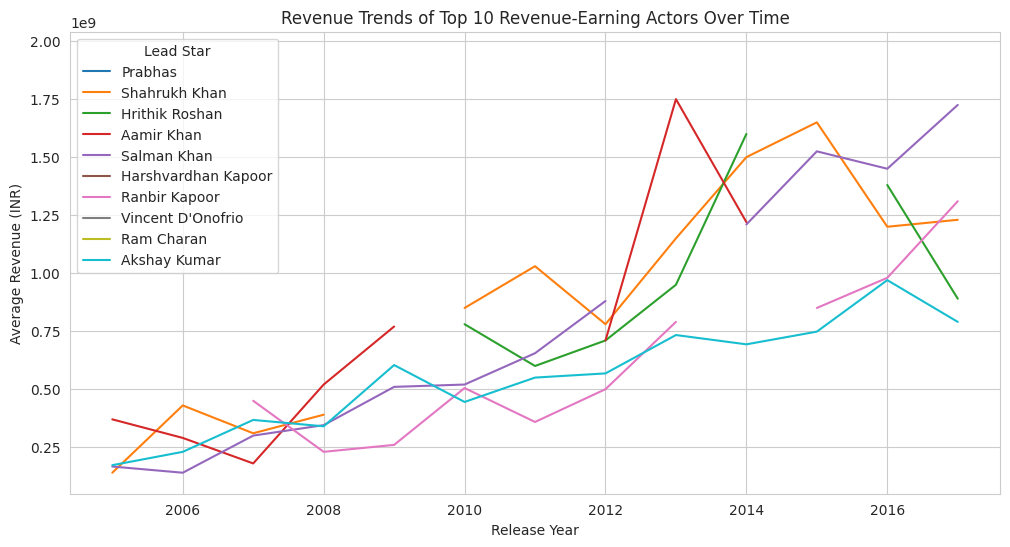

In [ ]:
# Group by 'Release Year' and 'Lead Star' and get the average revenue
actor_revenue_by_year = df_updated.groupby(['Release Year', 'Lead Star'])['Revenue(INR)'].mean().unstack()

# Plot the revenue trends for the top actors
top_actors = actor_revenue_by_year.mean(axis=0).sort_values(ascending=False).head(10).index
actor_revenue_by_year[top_actors].plot(figsize=(12, 6))

plt.title('Revenue Trends of Top 10 Revenue-Earning Actors Over Time')
plt.ylabel('Average Revenue (INR)')
plt.xlabel('Release Year')
plt.legend(title='Lead Star')
plt.show()

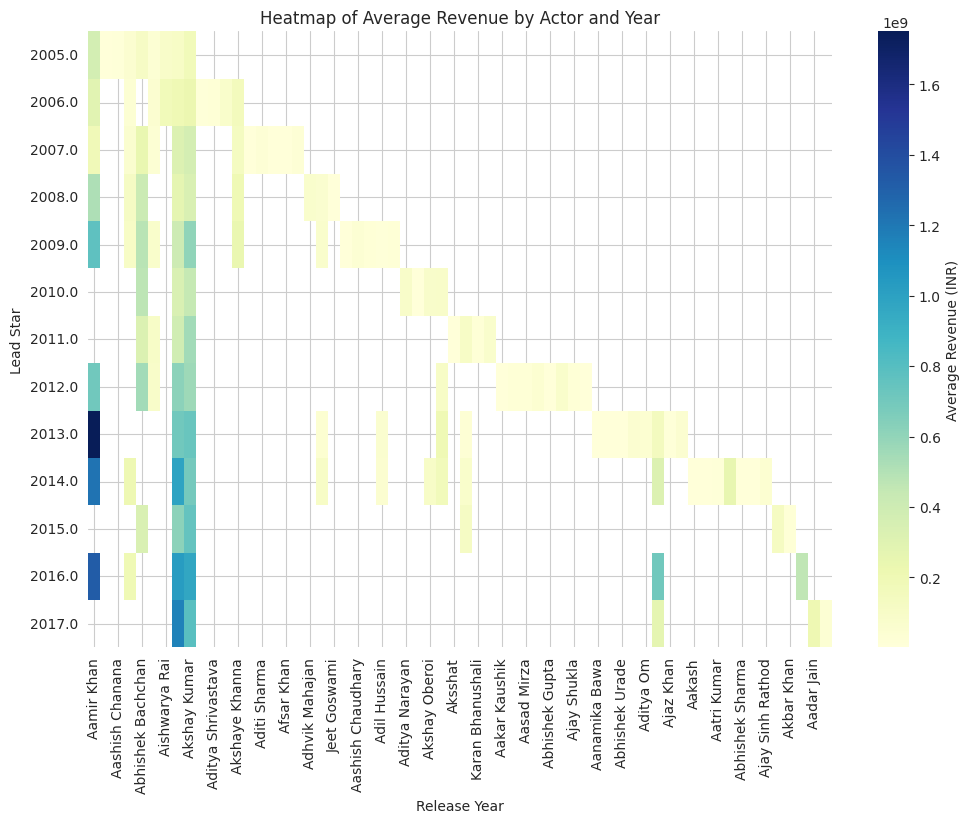

In [ ]:
# create a year-actor matrix of average revenue
heatmap_data = df_updated.groupby(['Release Year', 'Lead Star'])['Revenue(INR)'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='.0f', cbar_kws={'label': 'Average Revenue (INR)'})

plt.title('Heatmap of Average Revenue by Actor and Year')
plt.xlabel('Release Year')
plt.ylabel('Lead Star')
plt.show()

In [ ]:
actors_with_most_movies = df_updated['Lead Star'].value_counts().head(30).index
print(actors_with_most_movies)
df_actor_movies = df_updated[df_updated['Lead Star'].isin(actors_with_most_movies)]
#df_actor_movies
print("Available years:", df_actor_movies['Release Year'].unique())

Index(['Akshay Kumar', 'Ajay Devgn', 'Emraan Hashmi', 'Salman Khan',
       'Amitabh Bachchan', 'Sanjay Dutt', 'Shahid Kapoor', 'Saif Ali Khan',
       'Ranbir Kapoor', 'John Abraham', 'Shahrukh Khan', 'Sunny Deol',
       'Jackie Shroff', 'Jimmy Shergill', 'Abhishek Bachchan',
       'Tusshar Kapoor', 'Naseeruddin Shah', 'Randeep Hooda', 'Arshad Warsi',
       'Kay Kay Menon', 'Hrithik Roshan', 'Riteish Deshmukh', 'Govinda',
       'Tanveer Hashmi', 'Mithun Chakraborty', 'Vivek Oberoi', 'Aamir Khan',
       'Vinay Pathak', 'Aftab Shivdasani', 'Bobby Deol'],
      dtype='object', name='Lead Star')
Available years: [2008 2007 2005 2006 2016 2009 2014 2012 2013 2011 2010 2015 2017]


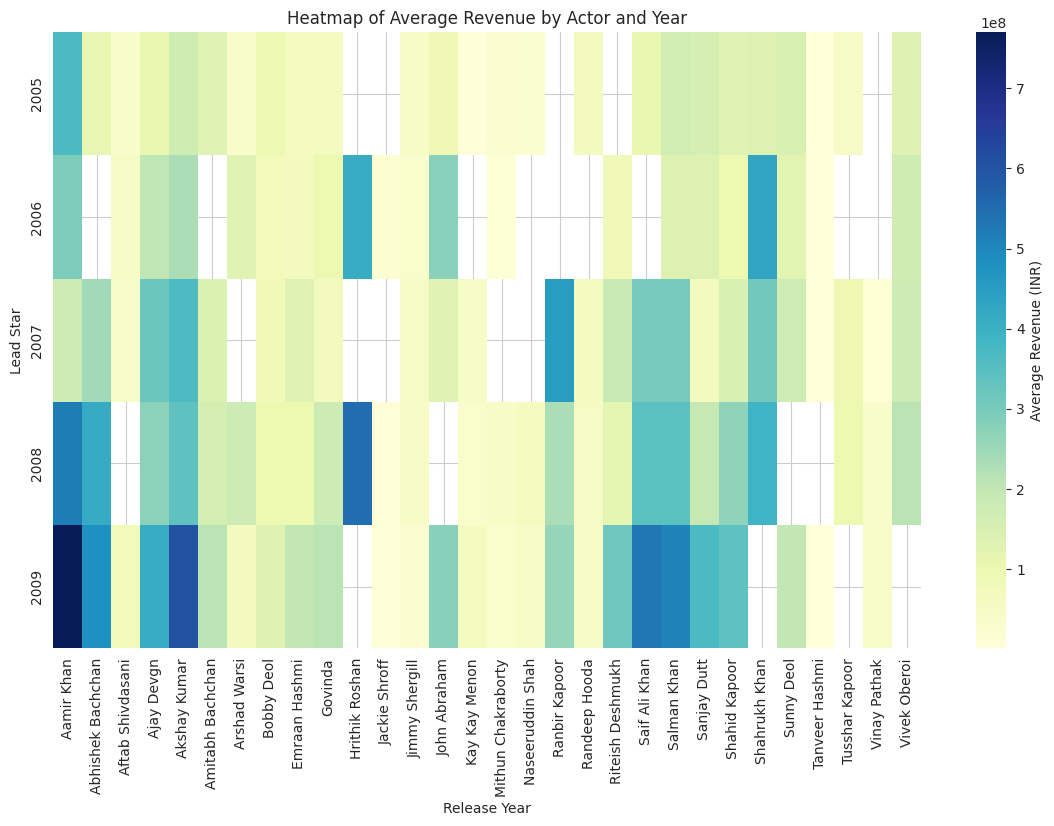

In [ ]:
# create a year-actor matrix of average revenue for actors with the most movies (top 30)
heatmap_data = df_actor_movies.groupby(['Release Year', 'Lead Star'])['Revenue(INR)'].mean().unstack().head()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='.0f', cbar_kws={'label': 'Average Revenue (INR)'})

plt.title('Heatmap of Average Revenue by Actor and Year')
plt.xlabel('Release Year')
plt.ylabel('Lead Star')
plt.show()

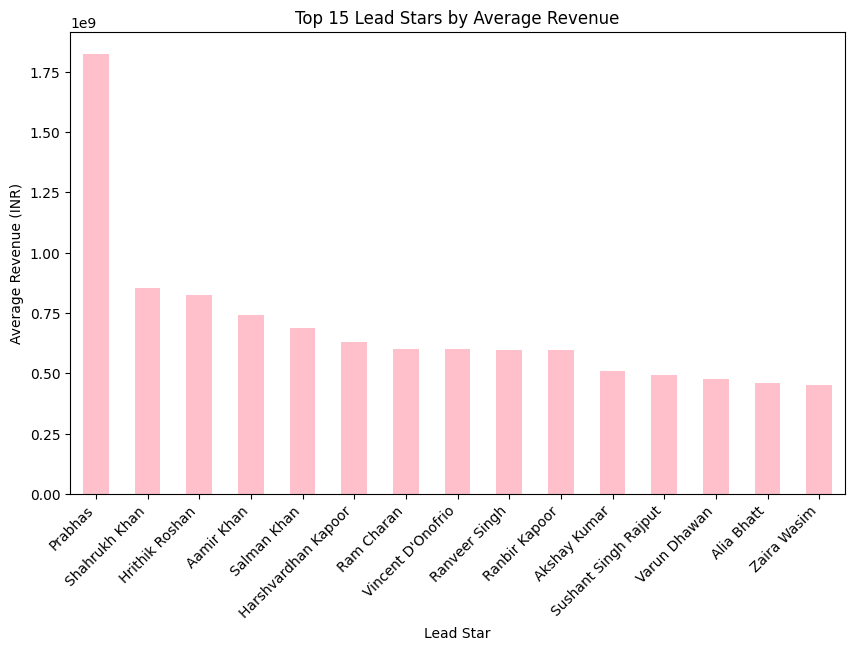

In [ ]:
# Group by actor and calculate their average revenue across all years
top_actors = df_updated.groupby('Lead Star')['Revenue(INR)'].mean().sort_values(ascending=False).head(15)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='pink')
plt.title('Top 15 Lead Stars by Average Revenue')
plt.xlabel('Lead Star')
plt.ylabel('Average Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-66-b9dacb4b87bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Release Year', y='Revenue(INR)', data=df_updated, palette='Set2')


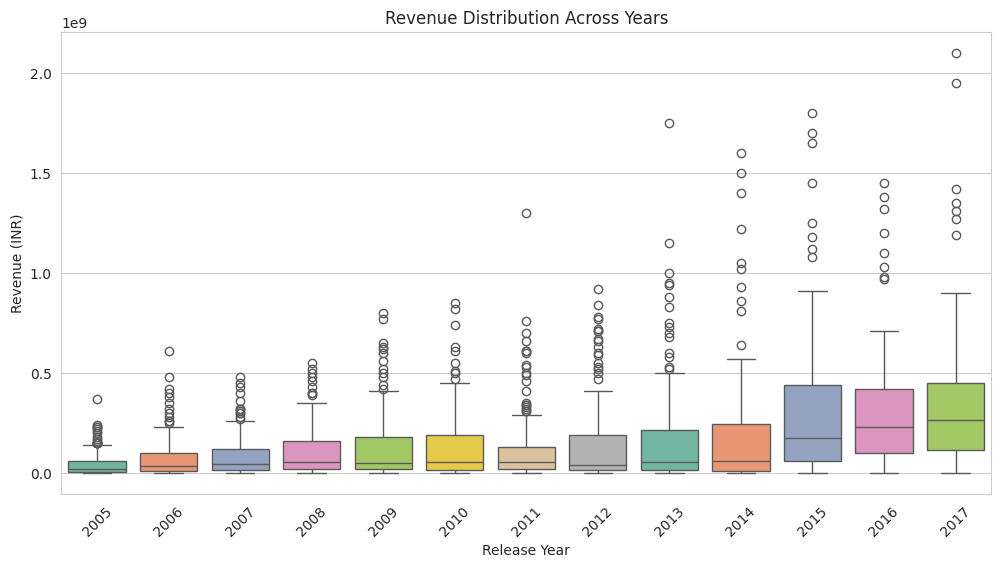

In [ ]:
# Plot the boxplot to show the distribution of revenues by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Release Year', y='Revenue(INR)', data=df_updated, palette='Set2')
plt.title('Revenue Distribution Across Years')
plt.xlabel('Release Year')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.show()

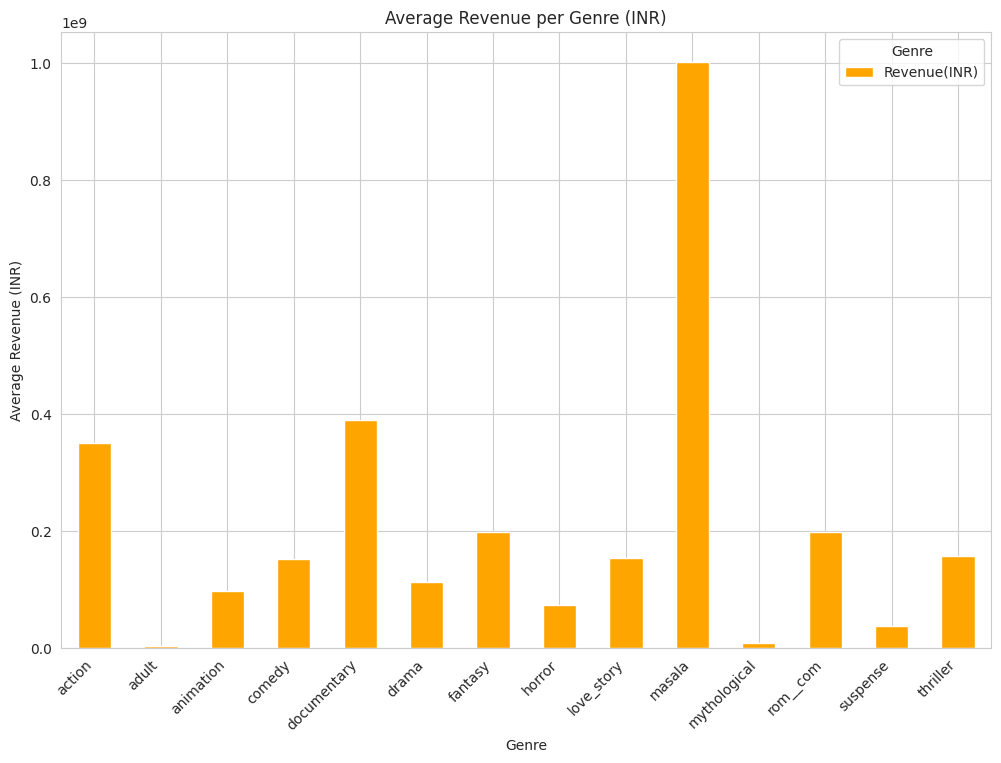

In [ ]:
# Group by genre to calculate the average revenue per genre
genre_revenue = df_updated.groupby('Genre')['Revenue(INR)'].mean()

# Plot the bar chart
#genre_revenue.plot(kind='bar', stacked=True, figsize=(12, 8))
genre_revenue.plot(kind='bar', stacked=True, figsize=(12, 8), color="orange")
plt.title('Average Revenue per Genre (INR)')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')
plt.show()

Hypothesis Testing - Are the revenues earned by male-led films significantly different from female-led movies?
Yes, P-value: 1.4885063600289524e-08. The difference is significant.

T-statistic: 5.691155259838676
P-value: 1.4885063600289524e-08


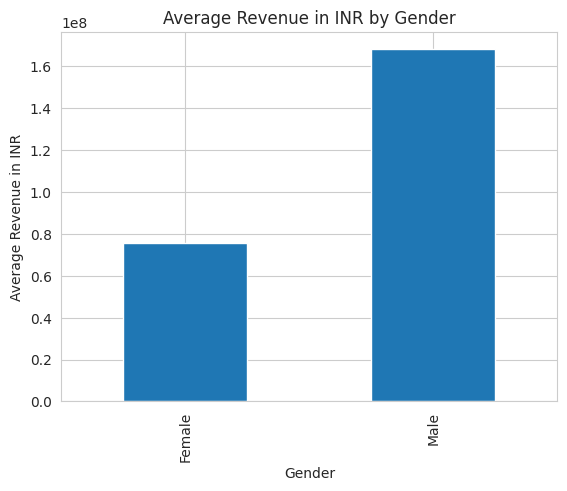

In [ ]:
# grouped_genders = df_updated.groupby("Lead Star Gender")["Revenue(INR)"].mean()
# print(grouped_genders)

# avg_rev_female = grouped_genders.loc[grouped_genders.index.get_level_values('Lead Star Gender') == "Female"]
# avg_rev_male = grouped_genders.loc[grouped_genders.index.get_level_values('Lead Star Gender') == "Male"]

# print(avg_rev_female)
# print(avg_rev_male)

# Separate male and female revenues


male_revenue = df_updated[df_updated['Lead Star Gender'] == 'Male']['Revenue(INR)']
female_revenue = df_updated[df_updated['Lead Star Gender'] == 'Female']['Revenue(INR)']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(male_revenue, female_revenue)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

gender_avg = df_updated.groupby('Lead Star Gender')['Revenue(INR)'].mean()

# Plot average revenue by gender
gender_avg.plot(kind='bar')
plt.title("Average Revenue in INR by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Revenue in INR")
plt.show()



Hypothesis Testing - Are the budgets given to male-led films significantly differ from female-led movies?

Yes, P-Value is 2.655686081529679e-05.

T-statistic: 4.212952434510907
P-value: 2.655686081529679e-05


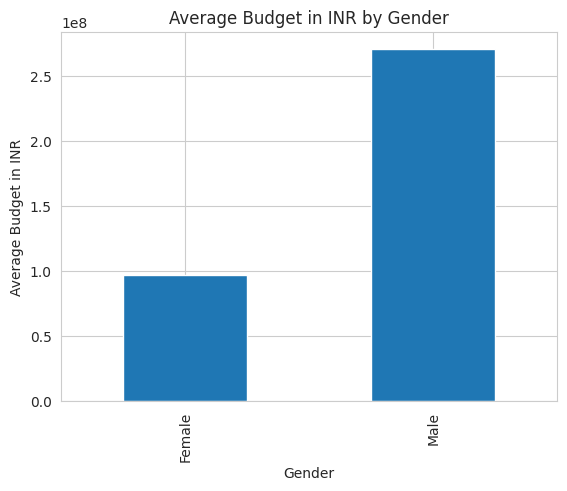

In [ ]:
male_budget = df_updated[df_updated['Lead Star Gender'] == 'Male']['Budget(INR)']
female_budget = df_updated[df_updated['Lead Star Gender'] == 'Female']['Budget(INR)']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(male_budget, female_budget)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

gender_avg = df_updated.groupby('Lead Star Gender')['Budget(INR)'].mean()

# Plot average revenue by gender
gender_avg.plot(kind='bar')
plt.title("Average Budget in INR by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Budget in INR")
plt.show()


Hypothesis Testing - Are the profits earned by male-led films significantly differ from female-led movies?

T-statistic: -2.8061519609878753
P-value: 0.005072119687423819


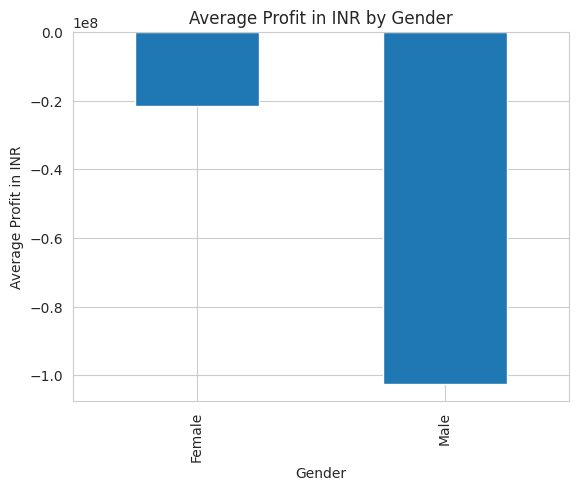

In [ ]:
male_profit = df_updated[df_updated['Lead Star Gender'] == 'Male']['Profit']
female_profit = df_updated[df_updated['Lead Star Gender'] == 'Female']['Profit']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(male_profit, female_profit)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

gender_avg = df_updated.groupby('Lead Star Gender')['Profit'].mean()

# Plot average revenue by gender
gender_avg.plot(kind='bar')
plt.title("Average Profit in INR by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Profit in INR")
plt.show()


Top Profitable Movies

In [ ]:
print(df_updated.groupby("Movie Name")["Profit"].sum().sort_values(ascending=False).head(15))

Movie Name
Bombay Velvet                         748635000
Broken Horses                         589870000
Mirzya                                495335000
Jagga Jasoos                          441427500
Game                                  422415000
Zanjeer                               378525000
Mohenjo Daro                          339250000
A Gentleman - Sundar Susheel Risky    335100000
Speedy Singhs                         315600000
Khelein Hum Jee Jaan Sey              313346250
Fitoor                                312175000
Aladin                                311050000
Aazaan                                303700000
David                                 297900000
Hawaizaada                            284100000
Name: Profit, dtype: int64


In [ ]:
#print(df_updated.sort_values(by="Profit", ascending=False).head(10))

Top Earning Movies

In [ ]:
print(df_updated.groupby("Movie Name")["Revenue(INR)"].sum().sort_values(ascending=False).head(15))

Movie Name
Tiger Zinda Hai                2100000000
Bahubali 2 - The Conclusion    1950000000
Prem Ratan Dhan Payo           1800000000
Dhoom 3                        1750000000
Bahubali - The Beginning       1700000000
Dilwale                        1650000000
Bang Bang                      1600000000
Happy New Year                 1500000000
Sultan                         1450000000
Bajirao Mastani                1450000000
Golmaal Again                  1420000000
Kick                           1400000000
Mohenjo Daro                   1380000000
Tubelight                      1350000000
Dangal                         1320000000
Name: Revenue(INR), dtype: int64


Does releasing movies during holiday periods affect the revenue of the movie? With Hypothesis Testing.

T-statistic: 6.2631997226491265
P-value: 4.791194964518942e-10


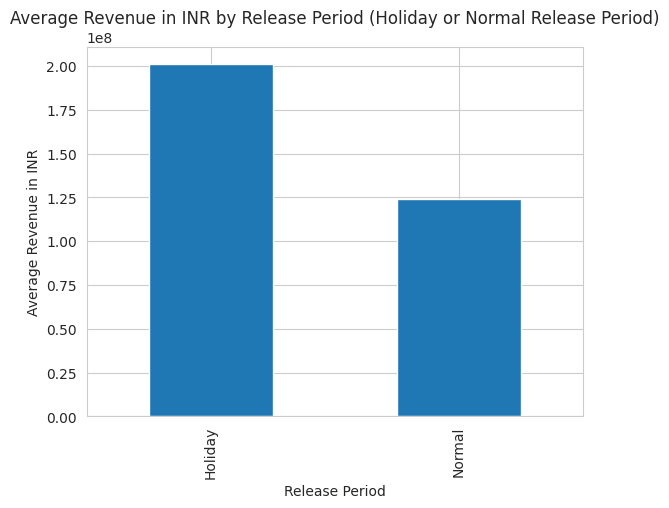

,Revenue(INR)
Release Period,
Holiday,200919200.0
Normal,124110312.5


In [ ]:
holiday_revenue = df_updated[df_updated['Release Period'] == 'Holiday']['Revenue(INR)']
normal_revenue = df_updated[df_updated['Release Period'] == 'Normal']['Revenue(INR)']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(holiday_revenue, normal_revenue)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

holiday_avg = df_updated.groupby('Release Period')['Revenue(INR)'].mean()

# Plot average revenue by release period
holiday_avg.plot(kind='bar')
plt.title("Average Revenue in INR by Release Period (Holiday or Normal Release Period)")
plt.xlabel("Release Period")
plt.ylabel("Average Revenue in INR")
plt.show()

holiday_avg

Top 15 actors with the most number of movies under a specific box office collection verdict (All time blockbuster, hit, flop, etc.)

In [ ]:
# Group by 'Collection' and 'Lead Star', then calculate the value counts
grouped_collection = df_updated.groupby(["Collection", "Lead Star"])["Collection"].value_counts()
grouped_collection

# For each year, get the top 15 actors based on the type of collection
top_actors_collection = grouped_collection.groupby("Collection", group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(15))
# Display the results
#top_actors_collection

#print(top_actors_collection.index)

# Filter top actors for atb movies
top_actors_atb = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "All Time Blockbuster"]

# Display the filtered data for ATB Actors
print(top_actors_atb)
print("")
print("")

# Blockbuster
top_actors_blockbuster = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Blockbuster"]
print(top_actors_blockbuster)
print("")
print("")

# Hit
top_actors_hit = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Hit"]
print(top_actors_hit)
print("")
print("")

# Semi Hit
top_actors_semihit = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Semi Hit"]
print(top_actors_semihit)
print("")
print("")

# Average
top_actors_avg = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Average"]
print(top_actors_avg)
print("")
print("")

# Below Average
top_actors_belowavg = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Below Average"]
print(top_actors_belowavg)
print("")
print("")

# Flop
top_actors_flop = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Flop"]
print(top_actors_flop)
print("")
print("")

# Disaster
top_actors_disaster = top_actors_collection.loc[top_actors_collection.index.get_level_values('Collection') == "Disaster"]
print(top_actors_disaster)
print("")
print("")

actors_per_collection = grouped_collection.groupby("Collection").size()
print(actors_per_collection)


Collection            Lead Star  
All Time Blockbuster  Aamir Khan     4
                      Prabhas        1
                      Salman Khan    1
Name: count, dtype: int64


Collection   Lead Star        
Blockbuster  Salman Khan          7
             Hrithik Roshan       3
             Ajay Devgn           2
             Shahrukh Khan        2
             Aamir Khan           1
             Aditya Roy Kapoor    1
             Akshay Kumar         1
             Prabhas              1
             R. Madhavan          1
             Ranbir Kapoor        1
             Sanjay Dutt          1
Name: count, dtype: int64


Collection  Lead Star           
Hit         Akshay Kumar            8
            Shahrukh Khan           6
            Ajay Devgn              5
            Saif Ali Khan           5
            Imran Khan              3
            Sushant Singh Rajput    2
            Salman Khan             2
            Shahid Kapoor           2
            Ranbir Kapoor    

What types of genres are prevalent in each box office collection verdict?

In [ ]:
# Group by 'Collection' and 'Genre', then calculate the value counts
grouped_collection = df_updated.groupby(["Collection", "Genre"])["Collection"].value_counts()
grouped_collection

# For each year, get the top 5 genres based on the type of collection
top_genres_collection = grouped_collection.groupby("Collection", group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5))
# Display the results
#top_actors_collection

#print(top_actors_collection.index)

# Filter top genres for atb movies
top_genres_atb = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "All Time Blockbuster"]

# Display the filtered data for ATB Actors
print(top_genres_atb)
print("")
print("")

# Blockbuster
top_genres_blockbuster = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Blockbuster"]
print(top_genres_blockbuster)
print("")
print("")

# Hit
top_genres_hit = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Hit"]
print(top_genres_hit)
print("")
print("")

# Semi Hit
top_genres_semihit = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Semi Hit"]
print(top_genres_semihit)
print("")
print("")

# Average
top_genres_avg = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Average"]
print(top_genres_avg)
print("")
print("")

# Below Average
top_genres_belowavg = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Below Average"]
print(top_genres_belowavg)
print("")
print("")

# Flop
top_genres_flop = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Flop"]
print(top_genres_flop)
print("")
print("")

# Disaster
top_genres_disaster = top_genres_collection.loc[top_genres_collection.index.get_level_values('Collection') == "Disaster"]
print(top_genres_disaster)
print("")
print("")

# Number of genres per collection
genres_per_collection = grouped_collection.groupby("Collection").size()
print(genres_per_collection)

Collection            Genre 
All Time Blockbuster  drama     3
                      masala    2
                      action    1
Name: count, dtype: int64


Collection   Genre     
Blockbuster  action        10
             comedy         3
             love_story     3
             masala         3
             drama          1
Name: count, dtype: int64


Collection  Genre     
Hit         comedy        20
            drama         17
            thriller       9
            love_story     7
            rom__com       7
Name: count, dtype: int64


Collection  Genre   
Semi Hit    drama       17
            thriller    11
            comedy      10
            action       6
            rom__com     6
Name: count, dtype: int64


Collection  Genre   
Average     drama       19
            comedy      11
            rom__com    10
            thriller     6
            action       3
Name: count, dtype: int64


Collection     Genre     
Below Average  comedy        10
               dr

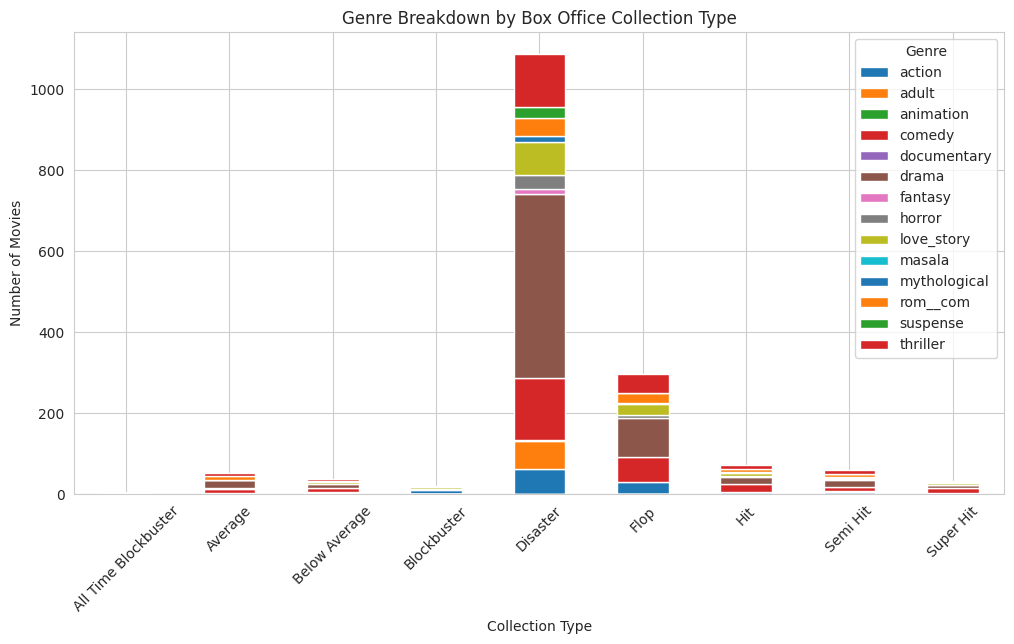

In [ ]:
grouped_collection = df_updated.groupby(["Collection", "Genre"]).size().reset_index(name='Movie Count')
stacked_data = grouped_collection.pivot_table(index='Collection', columns='Genre', values='Movie Count', fill_value=0)

# Create the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Genre Breakdown by Box Office Collection Type')
plt.ylabel('Number of Movies')
plt.xlabel('Collection Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-79-894b70d0db8d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_collection = grouped_collection.groupby("Collection", group_keys=False).apply(


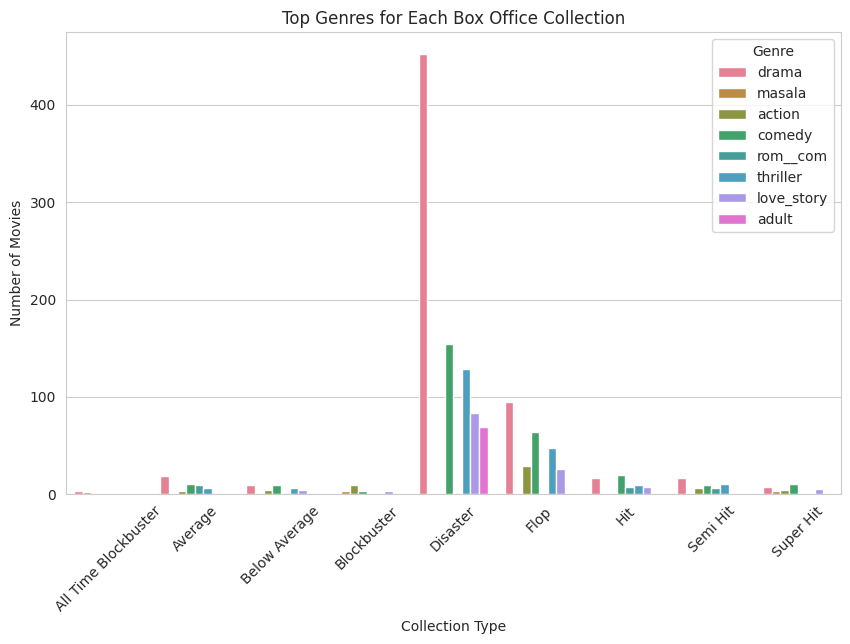

In [ ]:
# For each collection type, get the top 5 genres based on movie count
top_genres_collection = grouped_collection.groupby("Collection", group_keys=False).apply(
    lambda x: x.sort_values(by='Movie Count', ascending=False).head(5)
).reset_index(drop=True)  # Reset index to avoid issues with seaborn

# Plot the bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 8)
sns.barplot(data=top_genres_collection, x='Collection', y='Movie Count', hue='Genre', palette=colors)

plt.title('Top Genres for Each Box Office Collection')
plt.ylabel('Number of Movies')
plt.xlabel('Collection Type')
plt.xticks(rotation=45)
plt.show()

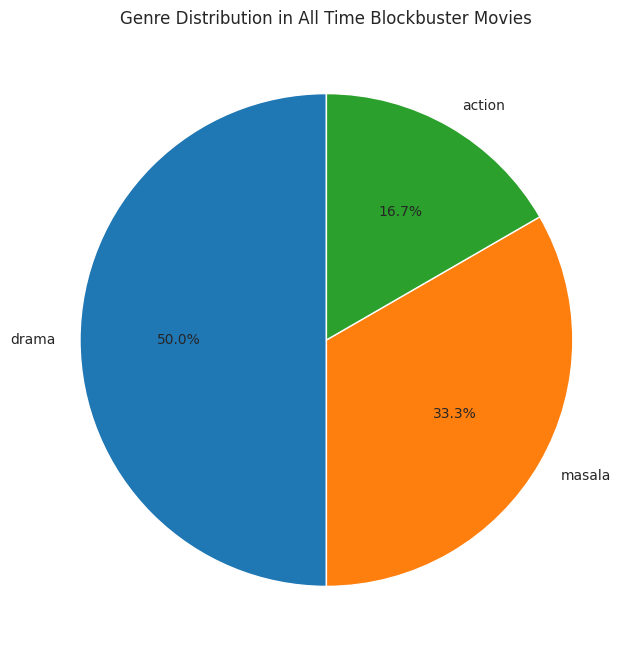

In [ ]:
# Filter top genres for "All Time Blockbuster" collection
top_genres_atb = top_genres_collection[top_genres_collection['Collection'] == "All Time Blockbuster"]

# Create a pie chart to show the genre distribution for All Time Blockbusters
plt.figure(figsize=(8, 8))
plt.pie(top_genres_atb['Movie Count'], labels=top_genres_atb['Genre'], autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution in All Time Blockbuster Movies')
plt.show()

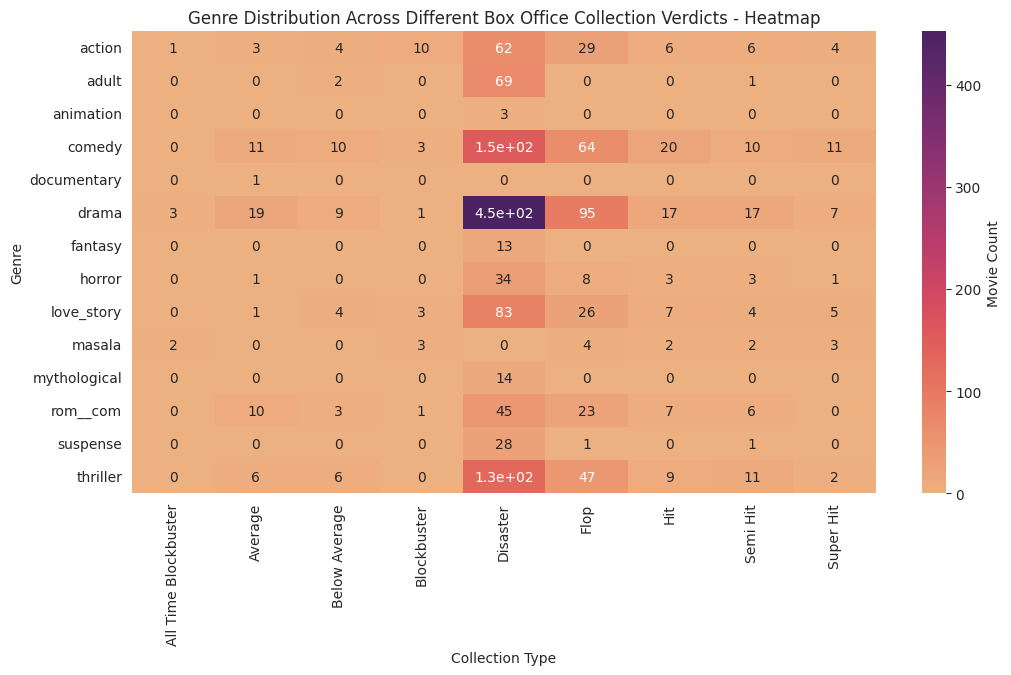

In [ ]:
heatmap_data = grouped_collection.pivot_table(index='Genre', columns='Collection', values='Movie Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='flare', cbar_kws={'label': 'Movie Count'})
plt.title('Genre Distribution Across Different Box Office Collection Verdicts - Heatmap')
plt.xlabel('Collection Type')
plt.ylabel('Genre')
plt.show()

Do Franchise Movies earn more in revenues? Are the revenue differences between franchise and non franchise movies significant?

T-statistic: 10.327306507837884
P-value: 2.820283292380332e-24


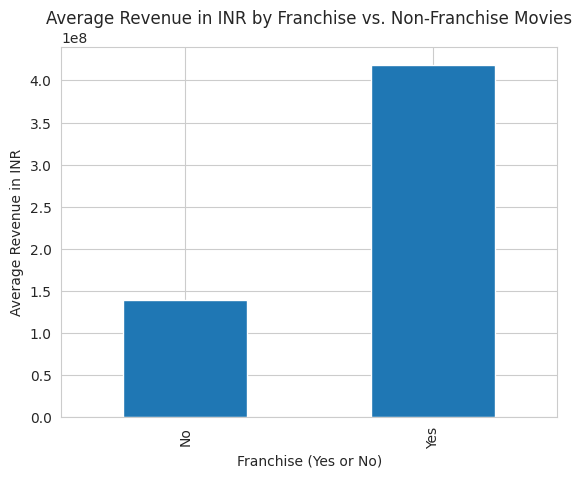

,Revenue(INR)
Franchise?,
No,1.393414e+08
Yes,4.189198e+08


In [ ]:
fran_revenue = df_updated[df_updated['Franchise?'] == 'Yes']['Revenue(INR)']
normal_revenue = df_updated[df_updated['Franchise?'] == 'No']['Revenue(INR)']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(fran_revenue, normal_revenue)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

fran_avg = df_updated.groupby('Franchise?')['Revenue(INR)'].mean()

# Plot average revenue by franchise vs. non-franchise movies
fran_avg.plot(kind='bar')
plt.title("Average Revenue in INR by Franchise vs. Non-Franchise Movies")
plt.xlabel("Franchise (Yes or No)")
plt.ylabel("Average Revenue in INR")
plt.show()

fran_avg

Do Remake Movies Earn more than Non Remake Movies? Is the difference significant?

T-statistic: 7.938237036192546
P-value: 3.739542214036288e-15


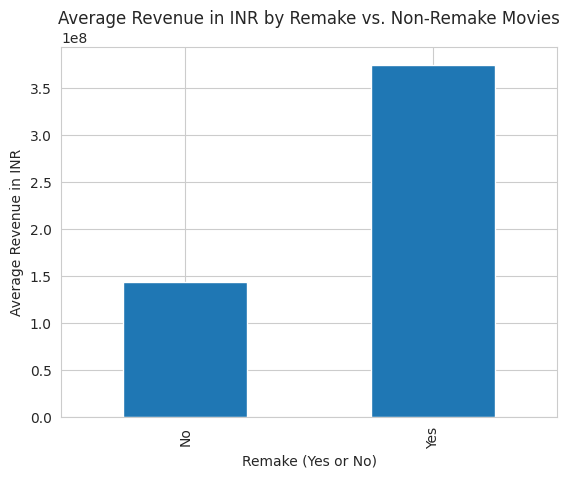

,Revenue(INR)
Remake?,
No,1.430626e+08
Yes,3.747535e+08


In [ ]:
remake_revenue = df_updated[df_updated['Remake?'] == 'Yes']['Revenue(INR)']
normal_revenue = df_updated[df_updated['Remake?'] == 'No']['Revenue(INR)']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(remake_revenue, normal_revenue)

# Interpret the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

remake_avg = df_updated.groupby('Remake?')['Revenue(INR)'].mean()

# Plot average revenue by remake vs. non-remake movies
remake_avg.plot(kind='bar')
plt.title("Average Revenue in INR by Remake vs. Non-Remake Movies")
plt.xlabel("Remake (Yes or No)")
plt.ylabel("Average Revenue in INR")
plt.show()

remake_avg

Look at the top rated movies.

In [ ]:
# Calculate the weighted average rating
df_updated['Weighted Avg Rating'] = df_updated['Rating Avg'] * df_updated['Rating Count'] / df_updated['Rating Count'].sum()

# Group by 'Movie Name' and calculate the weighted average and average rating
grouped = df_updated.groupby('Movie Name').agg(
    Weighted_Avg_Rating=('Weighted Avg Rating', 'sum'),
    Rating_Avg=('Rating Avg', 'mean'),
    Rating_Count=('Rating Count', 'sum')
).reset_index()

# Sort by the weighted average rating in descending order
grouped_sorted = grouped.sort_values('Weighted_Avg_Rating', ascending=False)

# Print the top 15 movies based on the weighted average rating, including Rating Avg
print(grouped_sorted.head(15))

                       Movie Name  Weighted_Avg_Rating  Rating_Avg  \
17                       3 Idiots             0.393358         8.4   
352                        Dangal             0.190442         8.3   
1440             Taare Zameen Par             0.185248         8.3   
1146                           PK             0.174871         8.1   
167      Bahubali - The Beginning             0.118687         8.0   
1260              Rang De Basanti             0.104754         8.1   
168   Bahubali 2 - The Conclusion             0.102925         8.2   
1087              My Name Is Khan             0.097654         7.9   
525          Gangs Of Wasseypur 1             0.090914         8.2   
526          Gangs Of Wasseypur 2             0.090898         8.2   
171             Bajrangi Bhaijaan             0.086124         8.1   
434                      Drishyam             0.084666         8.2   
1657     Zindagi Na Milegi Dobara             0.075941         8.2   
181                 

<ipython-input-84-79696d8be344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Weighted Avg Rating'] = df_updated['Rating Avg'] * df_updated['Rating Count'] / df_updated['Rating Count'].sum()


In [ ]:
print(df_updated.groupby("Movie Name")["Weighted Avg Rating"].sum().sort_values(ascending=False).head(15))

Movie Name
3 Idiots                       0.393358
Dangal                         0.190442
Taare Zameen Par               0.185248
PK                             0.174871
Bahubali - The Beginning       0.118687
Rang De Basanti                0.104754
Bahubali 2 - The Conclusion    0.102925
My Name Is Khan                0.097654
Gangs Of Wasseypur 1           0.090914
Gangs Of Wasseypur 2           0.090898
Bajrangi Bhaijaan              0.086124
Drishyam                       0.084666
Zindagi Na Milegi Dobara       0.075941
Barfi!                         0.075018
Chak De India                  0.073007
Name: Weighted Avg Rating, dtype: float64


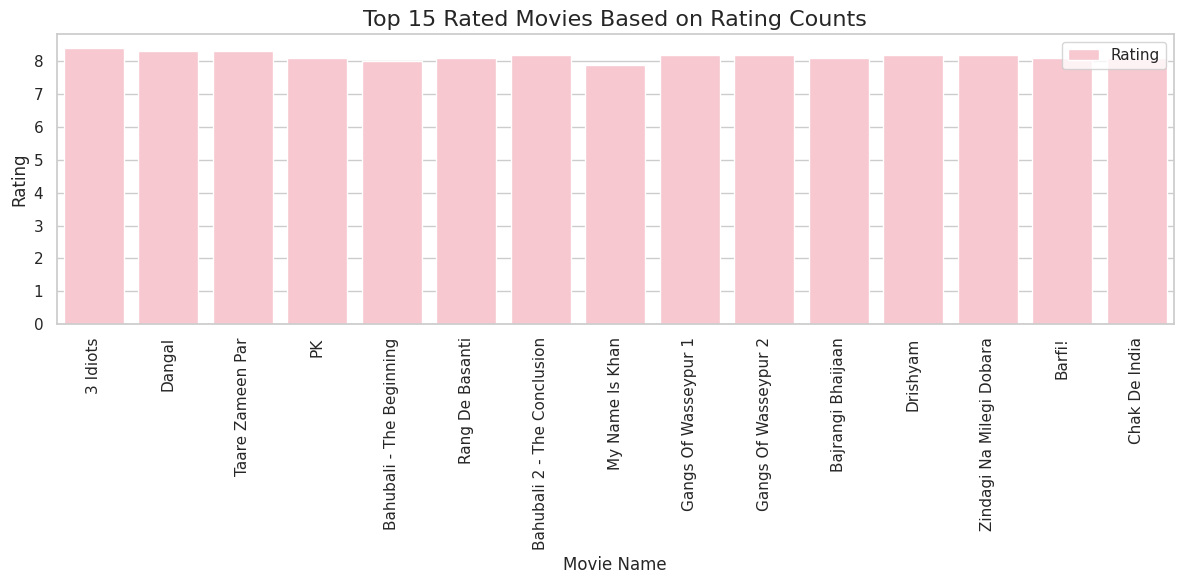

In [ ]:
# Create the figure and axes
plt.figure(figsize=(12, 6))

sns.set(style="whitegrid")

# Plot the average ratings
sns.barplot(data=grouped_sorted.head(15), x='Movie Name', y='Rating_Avg', color='pink', label='Rating')

# Overlay the Rating Avg as a second bar plot
# sns.barplot(data=grouped_sorted.head(15), x='Movie Name', y='Rating_Avg', color='orange', label='Rating Avg')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title("Top 15 Rated Movies Based on Rating Counts", fontsize=16)
plt.xlabel("Movie Name", fontsize=12)
plt.ylabel("Rating", fontsize=12)

# Display a legend to distinguish the bars
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

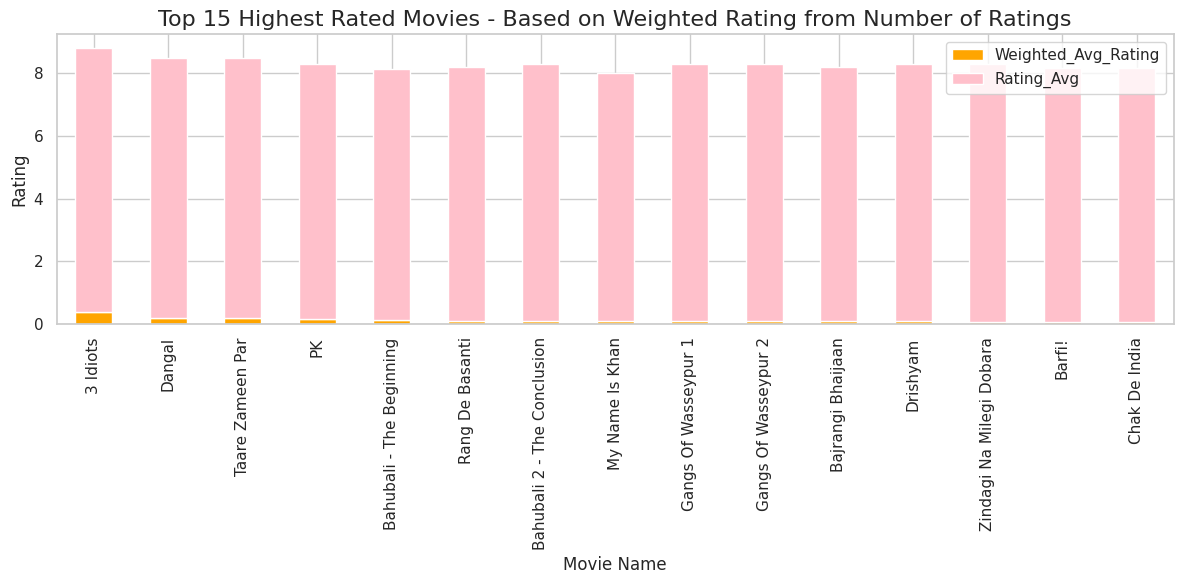

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Stack both ratings
grouped_sorted.head(15).set_index('Movie Name')[['Weighted_Avg_Rating', 'Rating_Avg']].plot(kind='bar', stacked=True, color=['orange', 'pink'], ax=plt.gca())

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add title and labels
plt.title("Top 15 Highest Rated Movies - Based on Weighted Rating from Number of Ratings", fontsize=16)
plt.xlabel("Movie Name", fontsize=12)
plt.ylabel("Rating", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

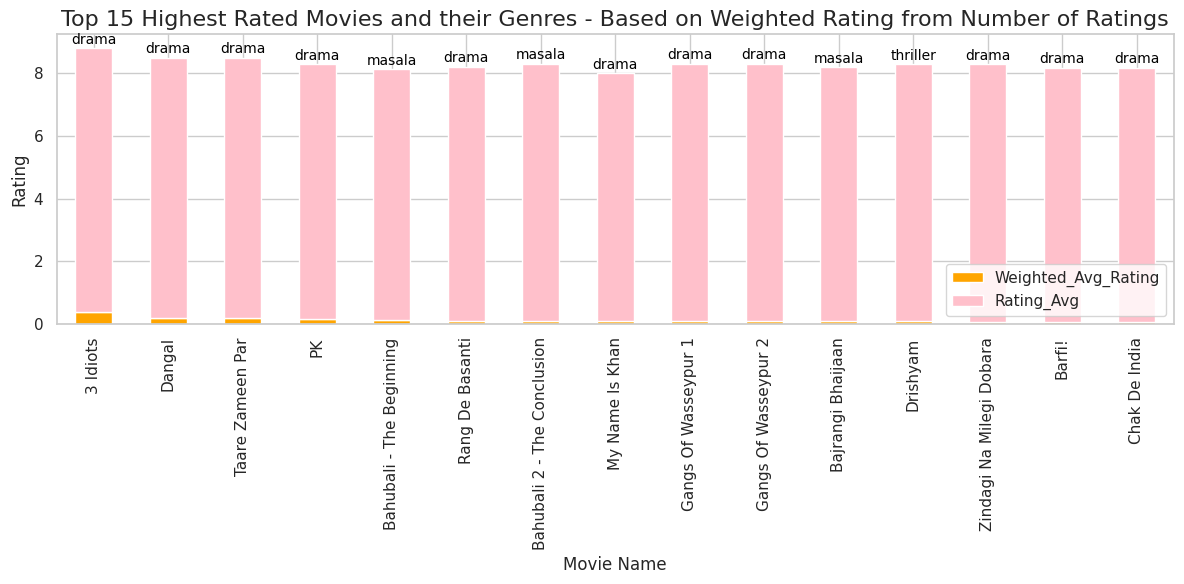

In [ ]:
# Ensure the movies are sorted by their weighted average rating
top_movies = grouped_sorted.head(15)

# Merge the genre information into the top_movies DataFrame
top_movies_with_genre = top_movies.merge(df_updated[['Movie Name', 'Genre']].drop_duplicates(), on='Movie Name', how='left')

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Stack both ratings: 'Weighted_Avg_Rating' and 'Rating_Avg'
top_movies_with_genre.set_index('Movie Name')[['Weighted_Avg_Rating', 'Rating_Avg']].plot(kind='bar', stacked=True, color=['orange', 'pink'], ax=plt.gca())

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add text annotations for genre labels
for i, row in top_movies_with_genre.iterrows():
    plt.text(
        i,  # x position (movie index)
        row['Weighted_Avg_Rating'] + row['Rating_Avg'] + 0.05,  # y position (just above the bars)
        row['Genre'],  # Genre text
        ha='center',  # Horizontal alignment (center)
        va='bottom',  # Vertical alignment (bottom)
        fontsize=10,  # Font size
        color='black'  # Text color
    )

# Add title and labels
plt.title("Top 15 Highest Rated Movies and their Genres - Based on Weighted Rating from Number of Ratings", fontsize=16)
plt.xlabel("Movie Name", fontsize=12)
plt.ylabel("Rating", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Total Number of Movies Made Each Year

In [ ]:
movies_each_year = df_updated.groupby("Release Year")["Movie Name"].count()
print(movies_each_year)



Release Year
2005    181
2006    134
2007    123
2008    127
2009    134
2010    147
2011    142
2012    140
2013    164
2014    152
2015     84
2016     67
2017     70
Name: Movie Name, dtype: int64


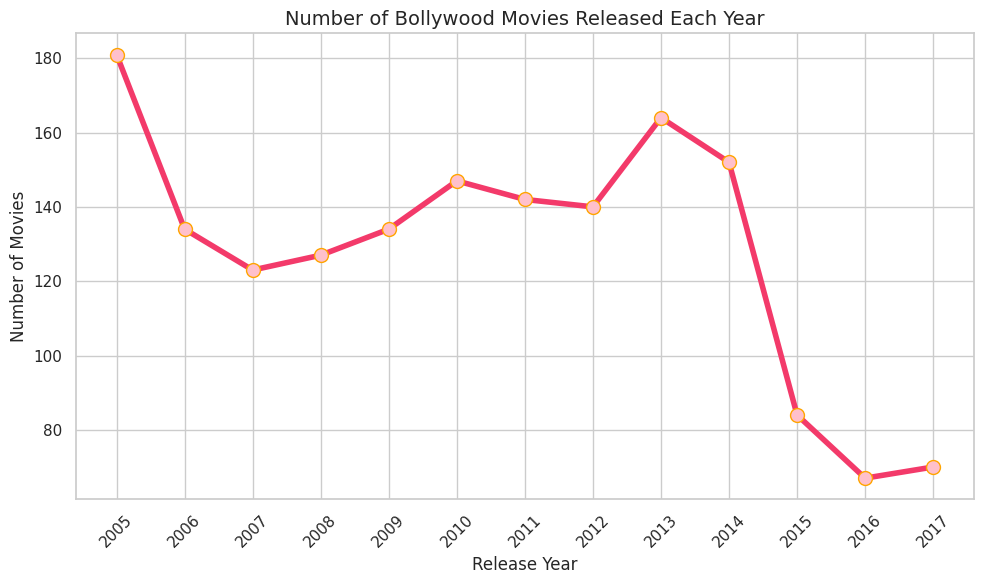

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Figure Size
plt.plot(movies_each_year.index, movies_each_year.values, marker='o', color='#F33A6A', linestyle='-', linewidth=4, markersize=10, markerfacecolor='pink', markeredgecolor='orange')

# Adding titles and labels
plt.title("Number of Bollywood Movies Released Each Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Format the x-axis to make it more readable
plt.xticks(movies_each_year.index, rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

Total Number of Movies Each Year Led by Popular Male Actors (SRK, SK, AK, HR, RK)

In [ ]:
actors = ['Shahrukh Khan', 'Salman Khan', 'Aamir Khan', 'Hrithik Roshan', 'Ranbir Kapoor']

# Filter the DataFrame using the 'isin' method to select rows where 'Lead Star' is in the list of actors
pop_male_actors = df_updated[df_updated['Lead Star'].isin(actors)]

# Display the combined DataFrame
#print(pop_male_actors)
#pop_male_actors
pop_male_actors.groupby("Lead Star")["Movie Name"].count()

,Movie Name
Lead Star,
Aamir Khan,10
Hrithik Roshan,11
Ranbir Kapoor,17
Salman Khan,27
Shahrukh Khan,16


<ipython-input-47-ceb8125988f5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lead Star', y='Movie Name', data=movies_count, palette='Blues')


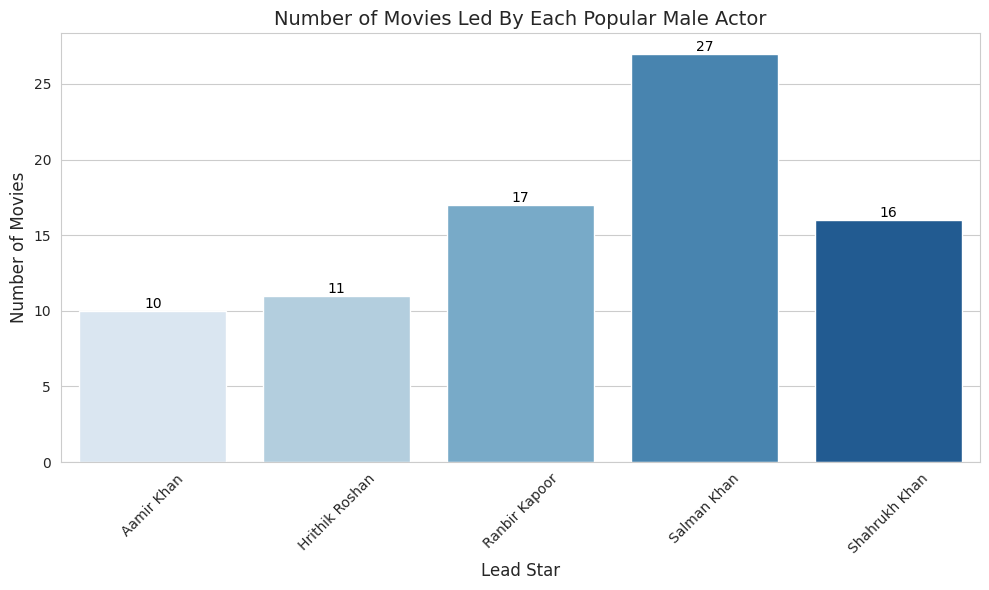

In [ ]:
# Group by 'Lead Star' and count the number of movies
movies_count = pop_male_actors.groupby("Lead Star")["Movie Name"].count().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Star', y='Movie Name', data=movies_count, palette='Blues')

# Adding title and labels
plt.title("Number of Movies Led By Each Popular Male Actor", fontsize=14)
plt.xlabel("Lead Star", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Add count above each bar
# plt.gca().patches is the bar elements of the current axes
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group by both 'Lead Star' and 'Release Year' and count the movies
movies_count_by_year = pop_male_actors.groupby(['Lead Star', 'Release Year'])['Movie Name'].count().reset_index()

# Display the result
movies_count_by_year

,Lead Star,Release Year,Movie Name
0,Aamir Khan,2005,1
1,Aamir Khan,2006,2
2,Aamir Khan,2007,1
3,Aamir Khan,2008,1
4,Aamir Khan,2009,1
5,Aamir Khan,2012,1
6,Aamir Khan,2013,1
7,Aamir Khan,2014,1
8,Aamir Khan,2016,1
9,Hrithik Roshan,2006,2


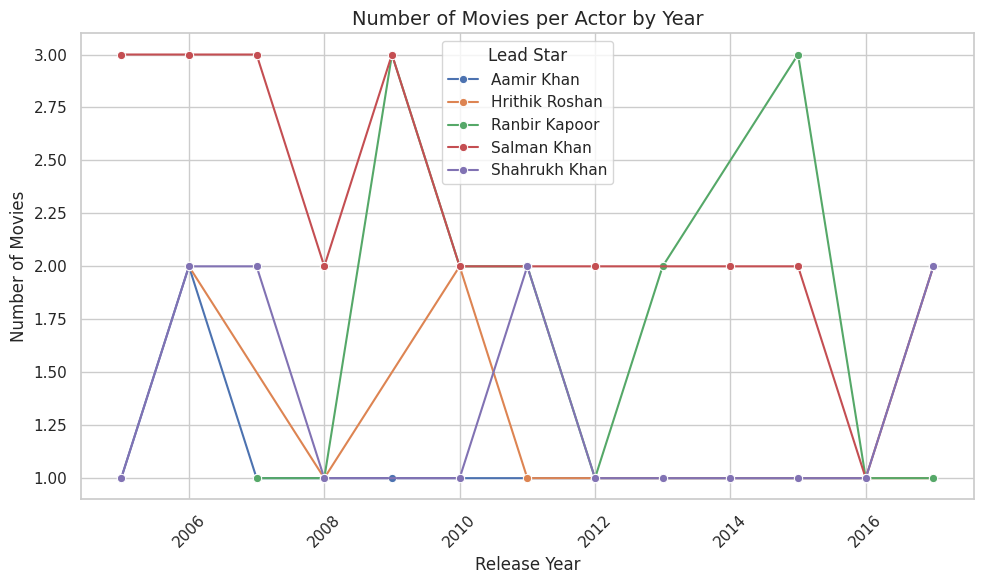

In [ ]:
# Create a Seaborn style plot
plt.figure(figsize=(10, 6))

# Use Seaborn lineplot
sns.lineplot(x='Release Year', y='Movie Name', hue='Lead Star', data=movies_count_by_year, marker='o')

# Adding titles and labels
plt.title("Number of Movies per Actor by Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display legend
plt.legend(title='Lead Star')

# Show the plot
plt.tight_layout()
plt.show()

Total Number of Movies Each Year Led by Popular Female Actors (Kareena Kapoor, Katrina Kaif, Alia Bhatt, Priyanka Chopra, Deepika Padukone)

In [ ]:
actresses = ['Kareena Kapoor', 'Aishwarya Rai', 'Alia Bhatt', 'Priyanka Chopra', 'Deepika Padukone']

# Filter the DataFrame using the 'isin' method to select rows where 'Lead Star' is in the list of actors
pop_female_actresses = df_updated[df_updated['Lead Star'].isin(actresses)]

# Display the combined DataFrame
#print(pop_male_actors)
#pop_male_actors
pop_female_actresses.groupby("Lead Star")["Movie Name"].count()

,Movie Name
Lead Star,
Aishwarya Rai,3
Alia Bhatt,1
Deepika Padukone,1
Kareena Kapoor,3
Priyanka Chopra,6


<ipython-input-50-324058dbd30b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lead Star', y='Movie Name', data=movies_count, palette=pink_palette)


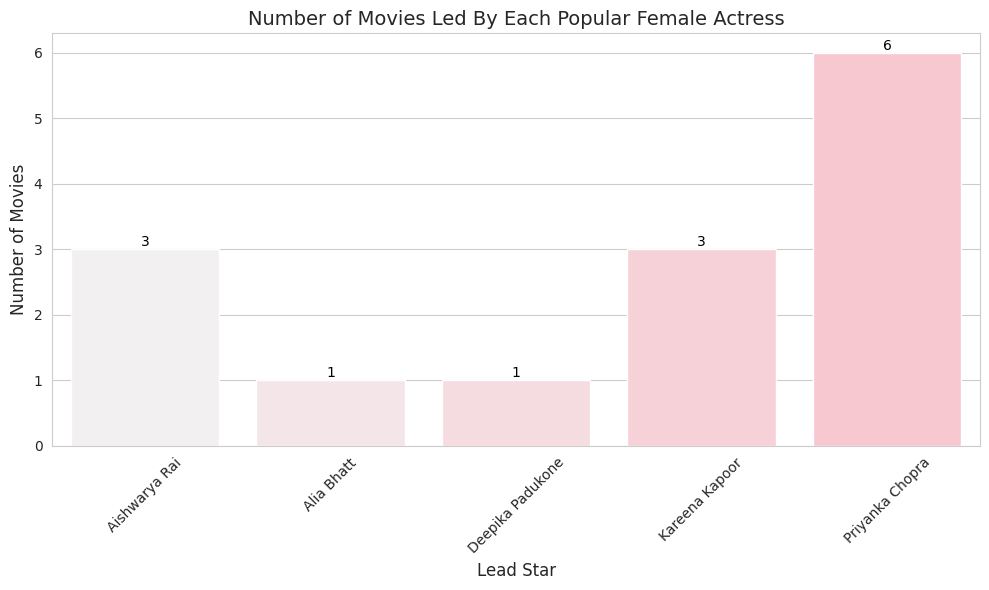

In [ ]:
# Group by 'Lead Star' and count the number of movies
movies_count = pop_female_actresses.groupby("Lead Star")["Movie Name"].count().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
pink_palette = sns.light_palette("pink", n_colors=len(movies_count))
sns.barplot(x='Lead Star', y='Movie Name', data=movies_count, palette=pink_palette)

# Adding title and labels
plt.title("Number of Movies Led By Each Popular Female Actress", fontsize=14)
plt.xlabel("Lead Star", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Add count above each bar
# plt.gca().patches is the bar elements of the current axes
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group by both 'Lead Star' and 'Release Year' and count the movies
movies_count_by_year = pop_female_actresses.groupby(['Lead Star', 'Release Year'])['Movie Name'].count().reset_index()

# Display the result
movies_count_by_year

,Lead Star,Release Year,Movie Name
0,Aishwarya Rai,2005,1
1,Aishwarya Rai,2006,2
2,Alia Bhatt,2016,1
3,Deepika Padukone,2014,1
4,Kareena Kapoor,2012,2
5,Kareena Kapoor,2016,1
6,Priyanka Chopra,2008,1
7,Priyanka Chopra,2009,1
8,Priyanka Chopra,2010,1
9,Priyanka Chopra,2011,1


<Figure size 1200x800 with 0 Axes>

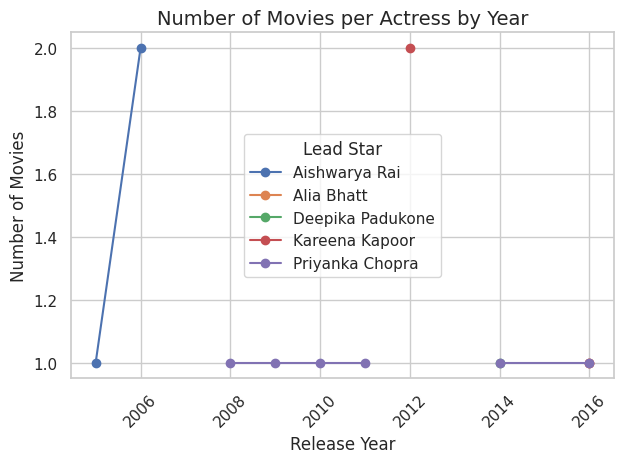

In [ ]:
# Create a pivot table to reorganize the data, with 'Lead Star' as columns and 'Release Year' as rows
pivot_data = movies_count_by_year.pivot(index='Release Year', columns='Lead Star', values='Movie Name')

# Plotting the data
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot each actress as a line on the same plot
pivot_data.plot(kind='line', marker='o', linestyle='-', markersize=6)

# Adding titles and labels
plt.title("Number of Movies per Actress by Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x-axis labels to make them readable
plt.xticks(rotation=45)

# Display legend to differentiate between actresses
plt.legend(title='Lead Star')

# Show the plot
plt.tight_layout()
plt.show()

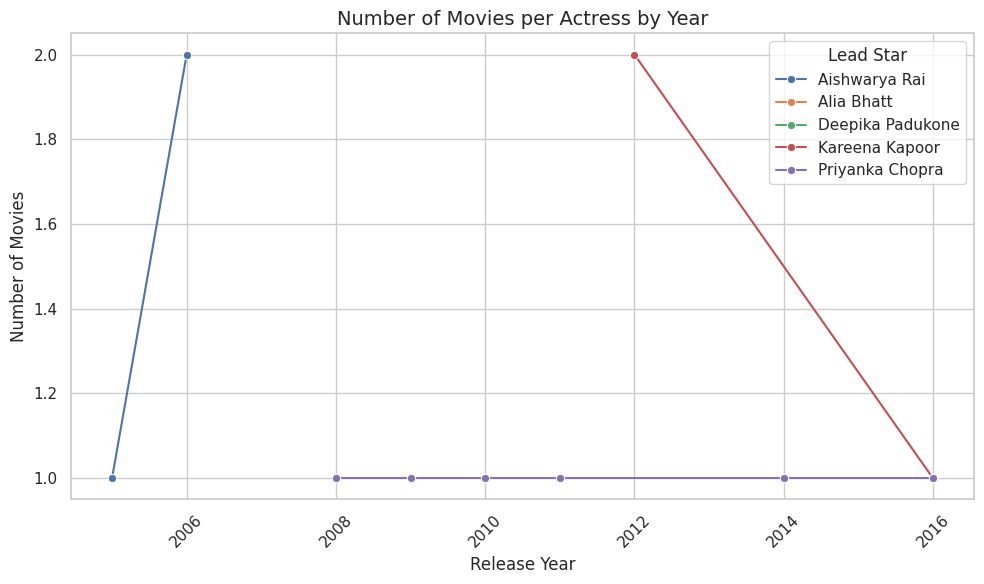

In [ ]:
# Create a Seaborn style plot
plt.figure(figsize=(10, 6))

# Use Seaborn lineplot
sns.lineplot(x='Release Year', y='Movie Name', hue='Lead Star', data=movies_count_by_year, marker='o')

# Adding titles and labels
plt.title("Number of Movies per Actress by Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display legend
plt.legend(title='Lead Star')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-32-2193b124ab0a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_year = grouped_years.groupby("Release Year", group_keys=False).apply(
<ipython-input-32-2193b124ab0a>:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(data=top_genres_year, x='Release Year', y='Movie Count', hue='Genre', palette=colors)


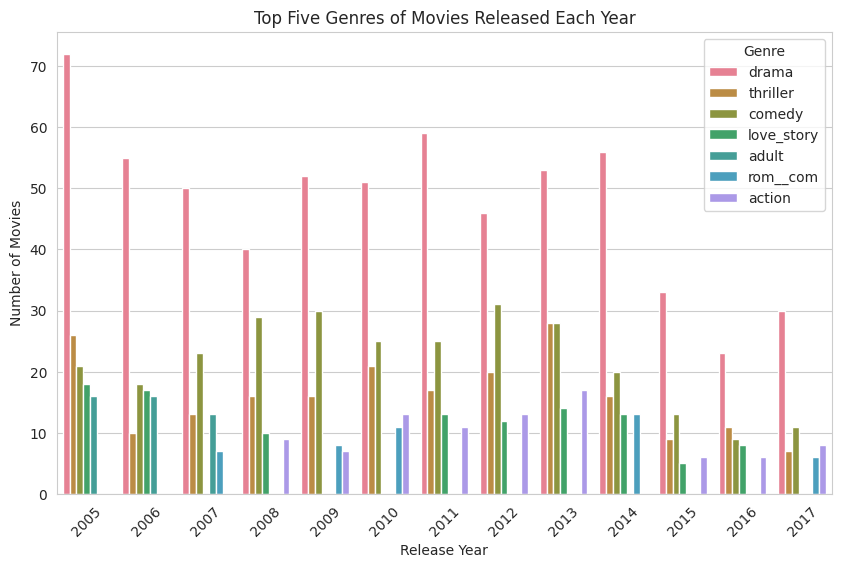

In [ ]:
# For each Year, get the top 5 Genres based on movie count
grouped_years = df_updated.groupby(["Release Year", "Genre"]).size().reset_index(name='Movie Count')
top_genres_year = grouped_years.groupby("Release Year", group_keys=False).apply(
    lambda x: x.sort_values(by='Movie Count', ascending=False).head(5)
).reset_index(drop=True)  # Reset index to avoid issues with seaborn

# Plot the bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", 8)
sns.barplot(data=top_genres_year, x='Release Year', y='Movie Count', hue='Genre', palette=colors)

plt.title('Top Five Genres of Movies Released Each Year')
plt.ylabel('Number of Movies')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.show()